<a href="https://colab.research.google.com/github/Diya-Amith/Data-Science-Project-Galaxy-Morphology-Classification-Using-Deep-Learning-and-Explainable-AI-/blob/main/new_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **Import Libraries and Initial Loading**

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from google.colab import drive
import cv2
from tensorflow.keras import layers, models


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge/images_training_rev1/images_training_rev1"
test_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge/images_test_rev1/images_test_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1/training_solutions_rev1.csv"
Data_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge"


## **Preprocessing**

### **Labels**

In [4]:
# Load labels
labels_df = pd.read_csv(labels_path)


In [5]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
labels_df.shape

(61578, 38)

In [7]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [9]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


In [10]:
# class with the highest probability
class_columns = [col for col in labels_df.columns if col.startswith('Class')]
labels_df['Class'] = labels_df.iloc[:, 1:38].idxmax(axis=1)

labels_df[['GalaxyID', 'Class','image_path']].head()

,GalaxyID,Class,image_path
0,100008,Class6.2,100008.jpg
1,100023,Class6.2,100023.jpg
2,100053,Class6.2,100053.jpg
3,100078,Class1.1,100078.jpg
4,100090,Class6.2,100090.jpg


In [11]:
labels_df[class_columns] = labels_df[class_columns].apply(pd.to_numeric)

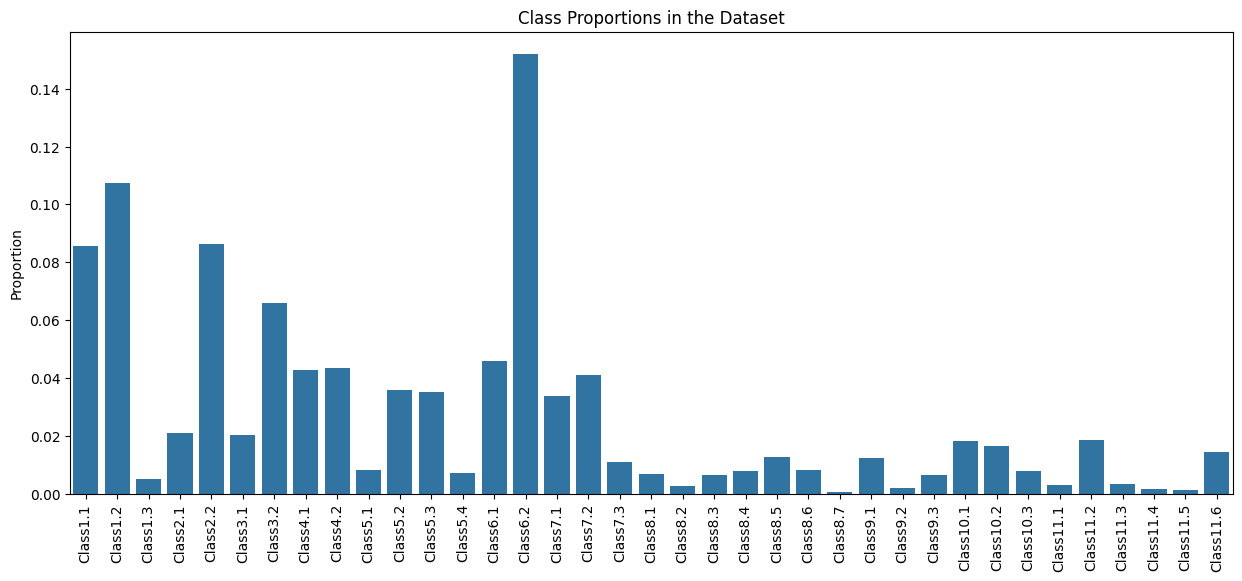

Class Totals:
 Class1.1     26634.078867
Class1.2     33391.365339
Class1.3      1552.555731
Class2.1      6552.375318
Class2.2     26838.990021
Class3.1      6313.349199
Class3.2     20525.640822
Class4.1     13278.008111
Class4.2     13560.981910
Class5.1      2514.985515
Class5.2     11112.881348
Class5.3     10954.986729
Class5.4      2256.136348
Class6.1     14274.236932
Class6.2     47303.763068
Class7.1     10469.538573
Class7.2     12793.768289
Class7.3      3370.772045
Class8.1      2143.681786
Class8.2       828.157580
Class8.3      2020.208523
Class8.4      2465.841696
Class8.5      3974.596655
Class8.6      2605.183434
Class8.7       236.565501
Class9.1      3880.250149
Class9.2       653.588625
Class9.3      2018.536496
Class10.1     5652.933056
Class10.2     5170.652560
Class10.3     2454.422356
Class11.1      949.008294
Class11.2     5809.165901
Class11.3     1082.996816
Class11.4      468.155495
Class11.5      431.440227
Class11.6     4537.240993
dtype: float64

Class P

In [12]:
# Sum probabilities
class_totals = labels_df[class_columns].sum()

# proportion of each class
class_proportions = class_totals / class_totals.sum()

# class proportions
plt.figure(figsize=(15, 6))
sns.barplot(x=class_columns, y=class_proportions)
plt.title("Class Proportions in the Dataset")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.show()

# totals and proportions
print("Class Totals:\n", class_totals)
print("\nClass Proportions:\n", class_proportions)

### **Images**

In [13]:
# number of images
train_image_count = len(os.listdir(train_images_path))
test_image_count = len(os.listdir(test_images_path))


print(f"Number of images in training folder: {train_image_count}")
print(f"Number of images in testing folder: {test_image_count}")

Number of images in training folder: 17499
Number of images in testing folder: 26714


In [14]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 17499
Number of rows in filtered_labels_df: 17499


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path,Class
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg,Class6.2
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg,Class6.2
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg,Class6.2
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg,Class1.1
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg,Class6.2


Class Balance Comparison:
          Original Proportion  Sampled Proportion
Class                                            
Class6.2             0.599863            0.600040
Class1.2             0.257786            0.257703
Class1.1             0.088234            0.088235
Class6.1             0.053889            0.053822
Class1.3             0.000229            0.000200


<ipython-input-15-5e944336dd7b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = filtered_labels_df.groupby('Class', group_keys=False).apply(


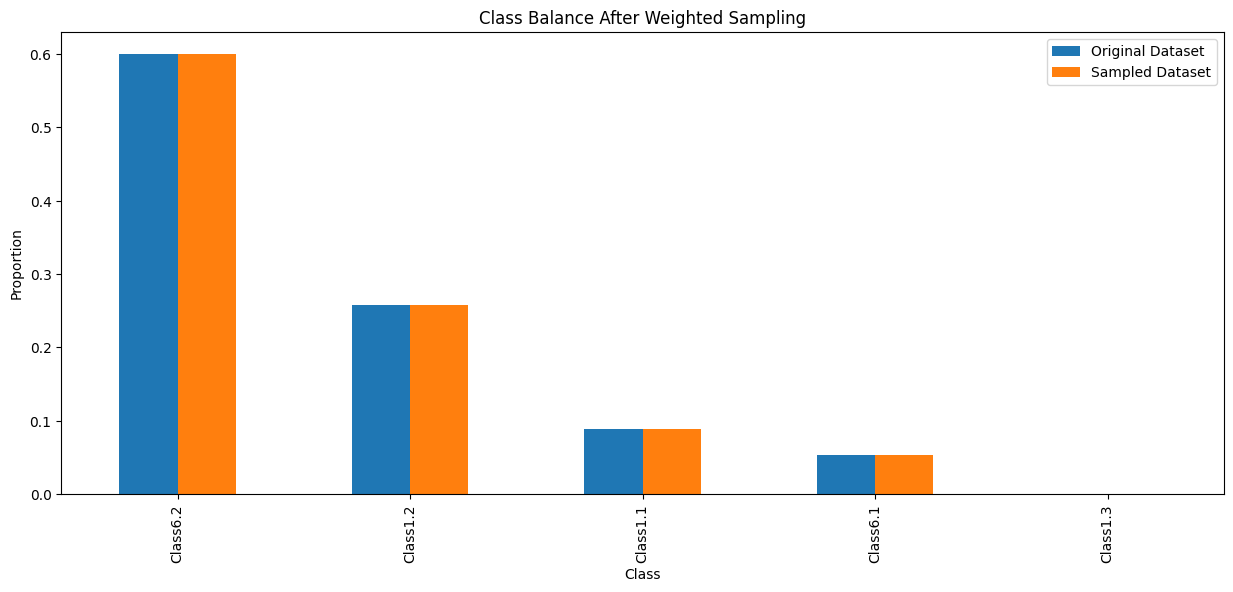

In [15]:
total_samples = 5000
original_class_distribution = filtered_labels_df['Class'].value_counts(normalize=True)
desired_samples_per_class = (original_class_distribution * total_samples).astype(int)

sampled_df = filtered_labels_df.groupby('Class', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), desired_samples_per_class[x.name]), random_state=42)
).reset_index(drop=True)

sampled_class_distribution = sampled_df['Class'].value_counts(normalize=True)
class_balance_comparison = pd.DataFrame({
    "Original Proportion": original_class_distribution,
    "Sampled Proportion": sampled_class_distribution
}).fillna(0)

# class balance comparison
print("Class Balance Comparison:")
print(class_balance_comparison)

# Visualize the comparison
class_balance_comparison.plot(kind='bar', figsize=(15, 6))
plt.title("Class Balance After Weighted Sampling")
plt.ylabel("Proportion")
plt.xlabel("Class")
plt.xticks(rotation=90)
plt.legend(["Original Dataset", "Sampled Dataset"])
plt.show()


<ipython-input-16-4e358a5287b7>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = filtered_labels_df.groupby('Class', group_keys=False).apply(


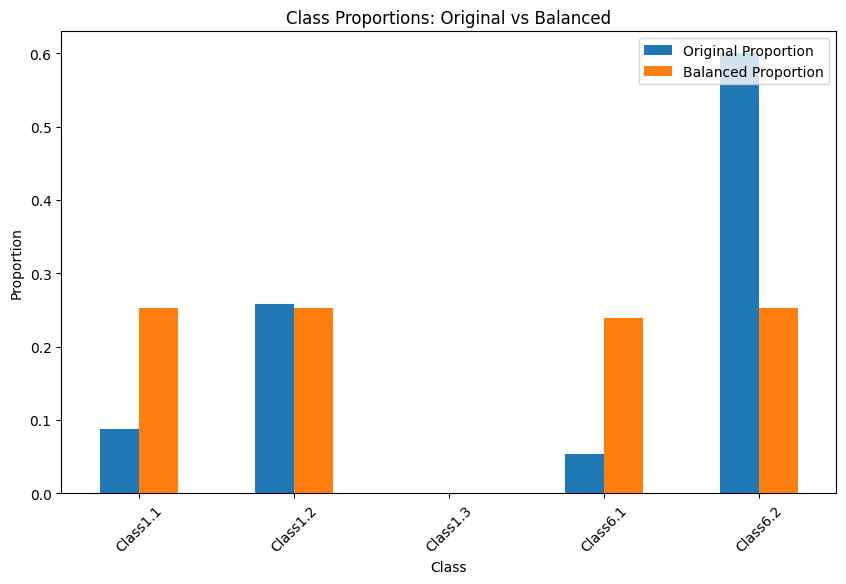

In [16]:
samples_per_class = total_samples // filtered_labels_df['Class'].nunique()
#balance
balanced_df = filtered_labels_df.groupby('Class', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), samples_per_class), random_state=42)
).reset_index(drop=True)

balanced_class_distribution = balanced_df['Class'].value_counts(normalize=True)
class_balance_comparison = pd.DataFrame({
    "Original Proportion": original_class_distribution,
    "Balanced Proportion": balanced_class_distribution
}).fillna(0)

# Plot
class_balance_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Class Proportions: Original vs Balanced')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [17]:
balanced_df.shape

(3947, 40)

In [18]:
image_files = os.listdir(train_images_path)
# image size
for image_file in image_files[:5]:
    image_path = os.path.join(train_images_path, image_file)
    with Image.open(image_path) as img:
        print(f"Image: {image_file}, Size: {img.size}")

Image: 269547.jpg, Size: (424, 424)
Image: 180888.jpg, Size: (424, 424)
Image: 197669.jpg, Size: (424, 424)
Image: 282607.jpg, Size: (424, 424)
Image: 186249.jpg, Size: (424, 424)


In [20]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    return img_array

image_paths = balanced_df['image_path'].apply(lambda x: os.path.join(train_images_path, x)).tolist()
labels = balanced_df[class_columns].values

image_data = np.array([preprocess_image(path) for path in image_paths])
label_data = np.array(labels)


print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

Image data shape: (3947, 224, 224, 3)
Label data shape: (3947, 37)


In [21]:
# save preproceesed data
np.save(os.path.join(Data_path, "preprocessed_image_data.npy"), image_data)  # Save image data
np.save(os.path.join(Data_path, "preprocessed_label_data.npy"), label_data)  # Save label data

print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


In [19]:
# File paths
image_data_file = os.path.join(Data_path, "preprocessed_image_data.npy")
label_data_file = os.path.join(Data_path, "preprocessed_label_data.npy")

image_data = np.load(image_data_file)
label_data = np.load(label_data_file)

## **EDA**

### **Plot random galaxies**

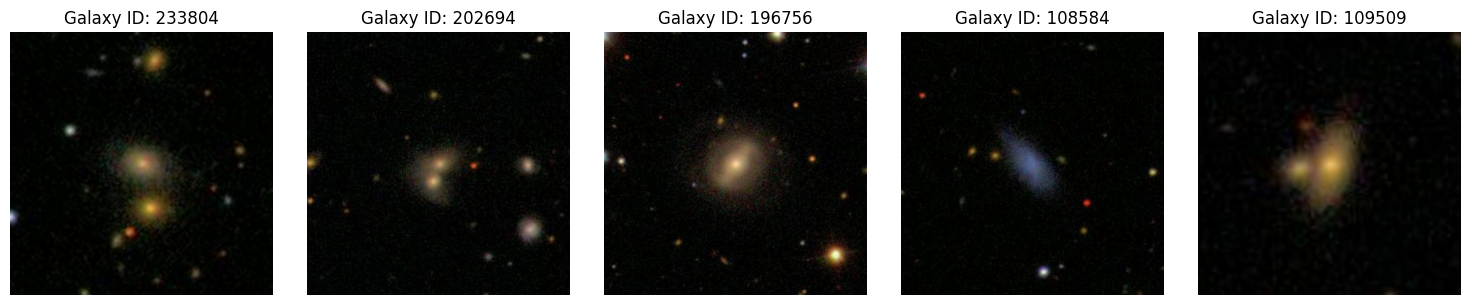

In [20]:
sample_images = balanced_df.sample(n=5, random_state=42)

# Plot the images
plt.figure(figsize=(15, 3))

for i, row in enumerate(sample_images.itertuples()):
    image_path = os.path.join(train_images_path, row.image_path)
    img = Image.open(image_path)
    width, height = img.size
    galaxy_id = row.GalaxyID

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'Galaxy ID: {galaxy_id}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Colour Histogram**

### **Correlation Matrix**

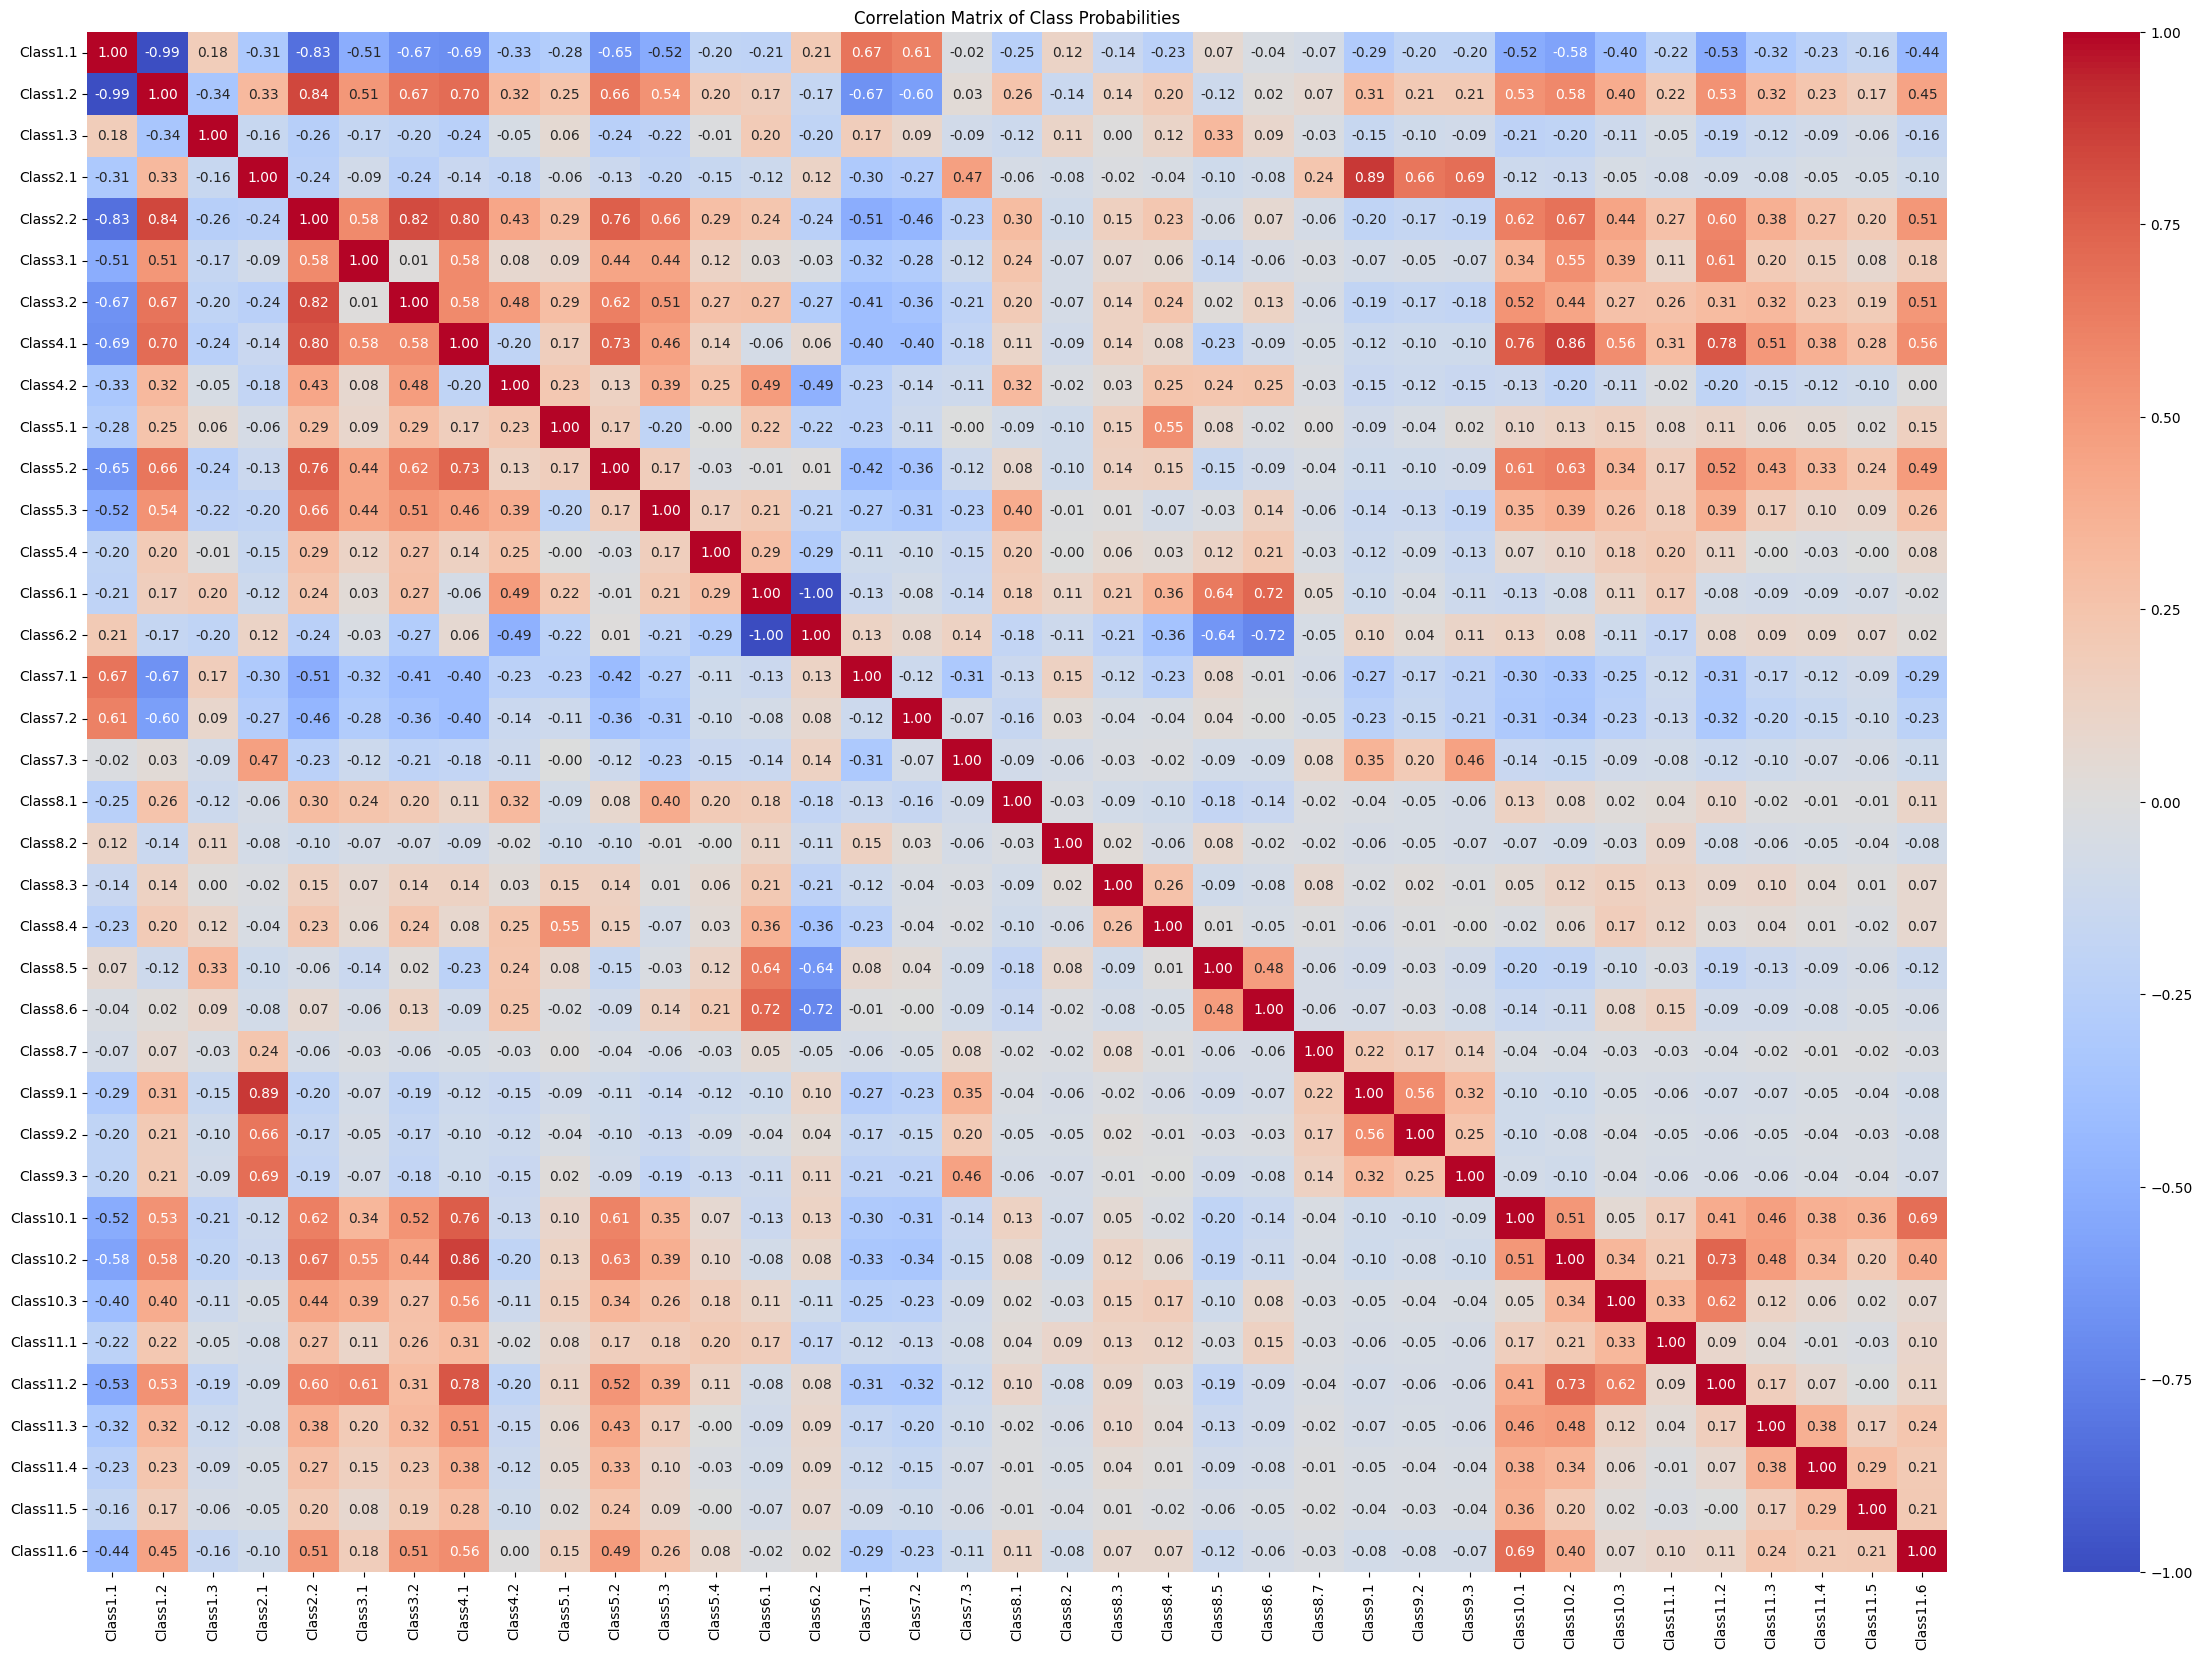

In [24]:
corr_matrix = balanced_df[class_columns].corr()

# Plotting
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Class Probabilities')
plt.show()

## **Data Splitting**

In [20]:
# Parameters for splitting
test_size = 0.2
val_size = 0.2
random_state = 42

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    image_data, label_data, test_size=test_size, random_state=random_state
)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Further split training data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=val_size, random_state=random_state
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training data shape: (3157, 224, 224, 3)
Training labels shape: (3157, 37)
Testing data shape: (790, 224, 224, 3)
Testing labels shape: (790, 37)
Training data shape: (2525, 224, 224, 3)
Validation data shape: (632, 224, 224, 3)
Training labels shape: (2525, 37)
Validation labels shape: (632, 37)


In [21]:

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize images to [0, 1]
    rotation_range=30,     # Random rotation (degrees)
    width_shift_range=0.2, # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,       # Shear angle
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'    # Filling missing pixels after transformation
)

# Data normalization for validation and test data
val_datagen = ImageDataGenerator(rescale=1./255)

# Creating the data generators for training and validation
train_generator = train_datagen.flow(
    X_train, y_train,        # Training data and labels
    batch_size=32,           # Number of samples per batch
    shuffle=True,            # Shuffle the data
    seed=random_state,      # Ensure reproducibility
)

val_generator = val_datagen.flow(
    X_val, y_val,            # Validation data and labels
    batch_size=32,           # Number of samples per batch
    shuffle=False,           # Do not shuffle validation data
    seed=random_state,      # Ensure reproducibility
)

# If you want to use the test set as well (without augmentation), you can do this:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow(
    X_test, y_test,          # Test data and labels
    batch_size=32,           # Number of samples per batch
    shuffle=False,           # Do not shuffle test data
    seed=random_state,      # Ensure reproducibility
)

## **Model1 : VGG16**

### **Implementation**

**Load Model**

In [28]:
# Load pretrained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers of VGG16
base_model.trainable = False

**Define layers**

In [34]:
# Add custom fully connected layers on top of the VGG16 model
model = models.Sequential()

# Add the pretrained VGG16 model as the base
model.add(base_model)

# Flatten the output of the VGG16 model
model.add(layers.Flatten())

# Add a fully connected layer with 512 units
model.add(layers.Dense(512, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

model.add(layers.Dense(37, activation='softmax'))  # Update this line to match the number of classes
 # 'num_classes' is the number of categories in your dataset


**Compile Model**

In [38]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
# Model summary to check the architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 37)                18981     
                                                                 
Total params: 27579237 (105.21 MB)
Trainable params: 12864549 (49.07 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### **Training**

In [ ]:

history = model.fit(
    train_generator,         # The generator for the training data
    epochs=10,               # Number of epochs (can be adjusted)
    validation_data=val_generator,  # The generator for the validation data
    callbacks=[              # Callbacks for model optimization
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Early stopping
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)  # Save best model
    ]
)

Epoch 1/10
18/79 [=====>........................] - ETA: 7:40 - loss: 26.1336 - accuracy: 0.1788